# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


In [1]:
import xlwings as xw
import numpy as np
import pandas as pd

## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

In [58]:
book1 = xw.Book("./data/себестоимостьА_в1.xlsx")
sheet = book1.sheets["Рецептура"]
consumption = sheet.range("G7:O10").options(np.array).value
price_per_unit = sheet.range("G14:O14").options(np.array).value
cost_price = consumption * price_per_unit
cost_price[np.isnan(cost_price)] = 0
cost_price = np.round(np.sum(cost_price, axis=1).tolist(), 2)
cost_price

array([21.48, 16.52, 17.42, 18.08])

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

In [59]:
sheet.range("T7:T10").options(transpose=True).value = cost_price
sheet.range("T6").value = "Себестоимость"

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

In [60]:
sheet.range("T4:T6").column_width = 15 
sheet.range("T4:T6").color = 255,192,0 
sheet.range("T4:T6").api.Font.ColorIndex = 2   
sheet.range("T4:T6").api.Font.Size = 11
sheet.range("T4:T10").api.Borders.Weight = 2
sheet.range("T4:T6").api.HorizontalAlignment = -4108
sheet.range("T4:T6").api.VerticalAlignment = -4108
sheet.range("T7:T10").color = 255,255,167 
sheet.range("T4:T6").merge()



com_error: (-2147352567, 'Ошибка.', (0, None, None, None, 0, -2146827284), None)

4. Выполнить 3 с помощью "протягиваемых" формул.

In [ ]:
sheet.range("U7:U10").formula = "=SUMPRODUCT(G7:O7, $G$14:$O$14)"


## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [74]:
import pandas as pd

In [148]:
reviews_sample = pd.read_csv("./data/reviews_sample.csv", sep=",")
reviews_sample = reviews_sample.rename(columns={"Unnamed: 0": "index"})
reviews_sample = reviews_sample.set_index("index")
reviews_sample

,user_id,recipe_id,date,rating,review
index,,,,,
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."


In [149]:
recipes_sample = pd.read_csv("./data/recipes_sample.csv", sep=",")
recipes_sample = recipes_sample.rename(columns={"Unnamed: 0": "index"})
recipes_sample.drop(["contributor_id", "n_steps",], axis=1, inplace=True)

recipes_sample

,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [150]:
from pandas import ExcelWriter
writer = ExcelWriter(r'recipes.xlsx')

recipes = recipes_sample.sample(frac = 0.05)
reviews = reviews_sample.sample(frac = 0.05)
recipes.to_excel(writer, encoding='utf8',sheet_name="Рецепты")
reviews.to_excel(writer, encoding='utf8',sheet_name='Отзывы')
writer.save()

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [151]:
sheet = xw.Book('recipes.xlsx').sheets['Рецепты']
sheet.range('H1').value = "second_assign"

sheet.range("H2:H1501").options(transpose=True).value = (recipes["minutes"] * 60).to_numpy()
sheet.autofit()

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [152]:
sheet.range('I1').value = "seconds_formula"
sheet.range("I2:I1501").formula = "=D2*60"
sheet.autofit()

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [153]:
sheet.range("H1:I1").api.HorizontalAlignment = -4108
sheet.range("H1:I1").api.VerticalAlignment = -4108
sheet.range("H1:I1").api.Font.Bold = True
sheet.range("H1:I1").api.Borders.Weight = 2

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [154]:
def rgb_to_hex(rgb):
    bgr = (rgb[2], rgb[1], rgb[0])
    strValue = '%02x%02x%02x' % bgr
    # print(strValue)
    iValue = int(strValue, 16)
    return iValue
rng = sheet.api.Range("$D2:$D1501")
rng.FormatConditions.Add(1, 6, '=5')
rng.FormatConditions(1).Interior.Color=rgb_to_hex((0,255,0))
rng.FormatConditions.Add(1, 1, '=5',"=10")
rng.FormatConditions(2).Interior.Color=rgb_to_hex((255,255,0))
rng.FormatConditions.Add(1, 5,"=10")
rng.FormatConditions(3).Interior.Color=rgb_to_hex((255,0,0))

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [157]:
# otzivi = xw.Book('recipes.xlsx').sheets['Отзывы']
sheet.range("J1").value = "n_reviews"
sheet.range("J2").formula = "=COUNTIF(Отзывы!C:C;C2)"
# >>> Причина 
sheet.range("J2:J1501").formula = "=COUNTIF(Отзывы!$C$2:$C$6336,C2)"

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [ ]:
from typing import Union

def validate(data: Union[xw.main.Sheet, xw.main.Book]) -> None:
    if isinstance(data, xw.main.Book):
        sheet = data.sheets["Отзывы"]
    elif isinstance(data, xw.main.Sheet):
        sheet = data
    else:
        raise ValueError("data должен принимать значение!")
    
    n = sheet.range('A1').current_region.end('down').row

    sheet.range("H2:H" + str(n)).formula = '=COUNTIF(Рецепты!$B$2:$B$1501,"="&C2)>0'
    sheet.range("A2:G" + str(n)).color = Colors.RED.value
    sheet.range('A2:G' + str(n)).api.autofilter()
    sheet.autofit()

    sheet.range('H:H').value = ' '

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [28]:
def find_delimiter(path):
    sniffer = csv.Sniffer()
    with open(path) as fp:
        delimiter = sniffer.sniff(fp.read(5000)).delimiter
    return delimiter
find_delimiter("./data/recipes_model.csv")

'\t'

In [25]:
import pandas as pd
recipes_model = pd.read_csv("./data/recipes_model.csv", sep="\t",header = None)
recipes_model.to_excel("recipes_model.xlsx",sheet_name='Модель',index=False,header = False, startrow=1)
sheet = xw.Book('recipes_model.xlsx').sheets['Модель']
sheet.autofit()

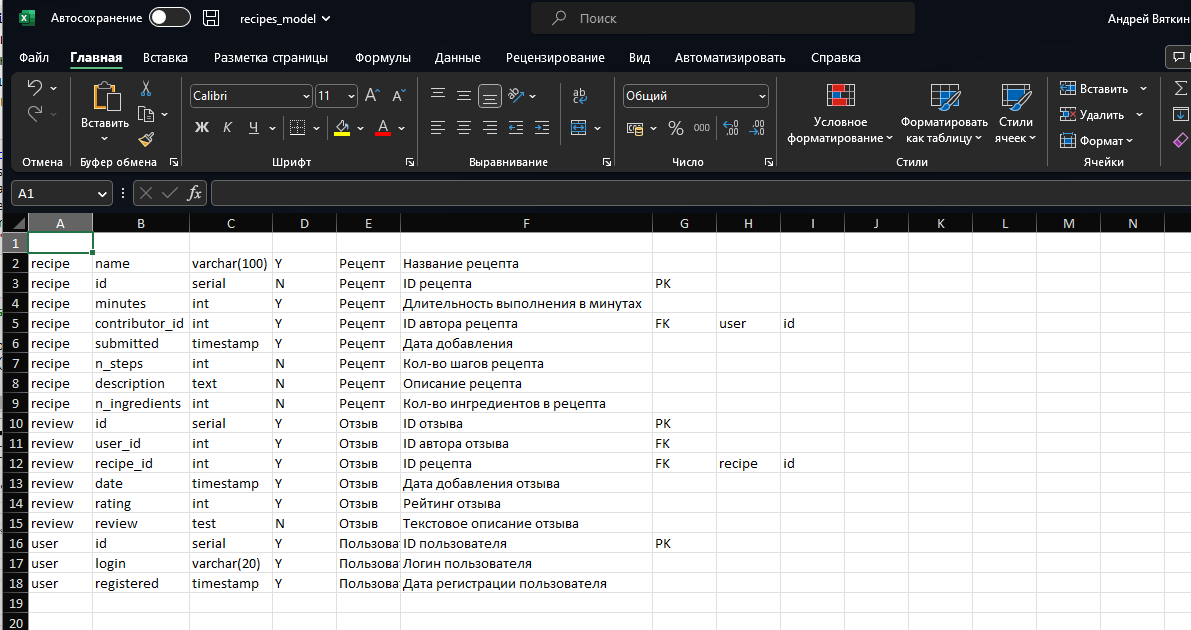

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [26]:
sheet.range('J2:J18').formula = '=CONCATENATE(B2," ", UPPER(C2), " ", IF(G2="PK", "PRIMARY KEY", IF(G2="FK", CONCATENATE("REFERENCES ", I2, "(", H2, ")"), "")), IF(AND(G2<>"PK", E2="Y"), " NOT NULL", ""))'

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [27]:
# В файле recipes_model.csv - отсутствует заголовок, но если бы он был, выглядело бы это так: 
header_color = (0, 204, 255)  # 00ccff в RGB
header_range = sheet.range('A1:J1')
header_range.color = header_color

# Применяем автоподбор ширины столбца
sheet.autofit()

# Делаем шрифт заголовков полужирным
header_range.api.Font.Bold = True


In [28]:
wb = xw.Book("recipes_model.xlsx")
ws = wb.sheets[0]

ws.tables.add(ws.used_range, name="a_table")
ws.tables["a_table"].show_autofilter = True

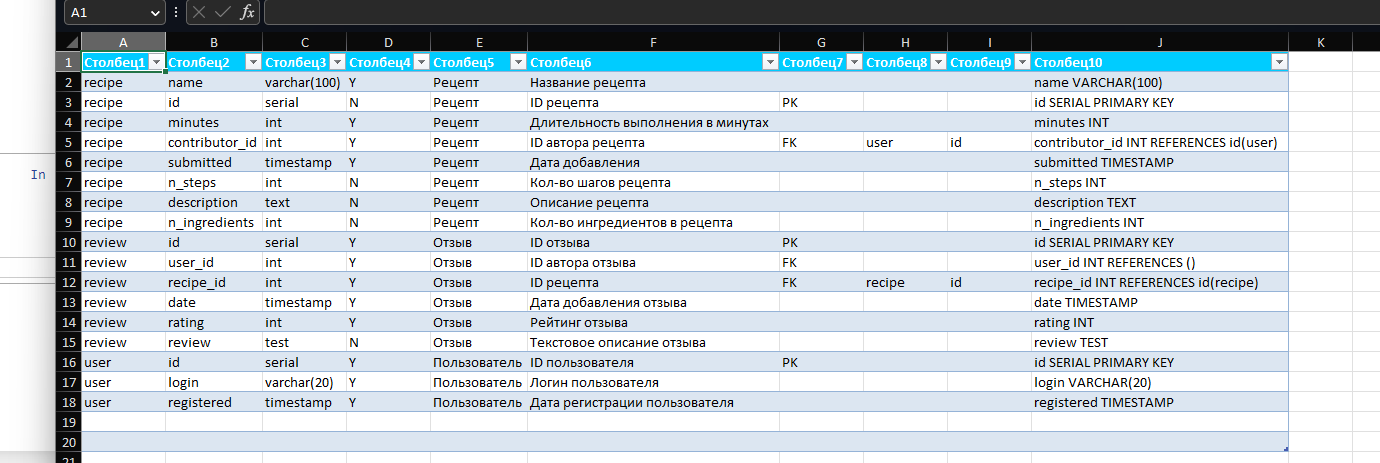

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [29]:
#А что тут сущность, что атрибут, если заголовков нет 